Importing Dependencies

In [1020]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [1022]:
##Reading and Understanding Data

In [1023]:
# Read the data from csv file
df = pd.read_csv('day.csv')

In [1024]:
# View top 5 rows
 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1025]:
# View Bottom 5 rows
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [1026]:
#Checking Shape of the table
df.shape

(730, 16)

In [1027]:
# describing the columns 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1028]:
# info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1029]:
# checking for the null values in column data
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1030]:
# renaming few columns for good readibility
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [1031]:
# View top 5 rows
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1032]:
# Copying the dataframe
df_copy = df.copy()

In [1033]:
# checking the shape of copied dataframe
df_copy.shape

(730, 16)

In [1034]:
# drop the duplicates
df_copy.drop_duplicates(inplace=True)

In [1035]:
# re-verifying the shape
df_copy.shape

(730, 16)

In [1036]:
#Reason: In many datasets, especially real-world data, there can be duplicate rows.
#Duplicate data can skew the performance of machine learning models and lead to overfitting or bias.
#Dropping duplicates ensures that each observation in the dataset is unique and valid for learning.
#The shape is same so there is no duplicates in the dataset

In [1037]:
#instant': Just an index, not relevant for model training.
#'dteday': Redundant since year and month provide enough date-related information.
#'casual' and 'registered': Redundant because they're subcategories of the cnt (total count) column.
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [1038]:
#Mapping the season column from numbers to season names enhances the interpretability of the data.
#This mapping prevents the model from incorrectly interpreting the seasons as ordinal.
# Encoding/mapping the season column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [1039]:
#Mapping weekday
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [1040]:
#mapping the month column
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [1041]:
#mapping the weathersit column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [1042]:
#Check top 5 rows now
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1043]:
# check the column info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [1044]:
##Visualising the DATA

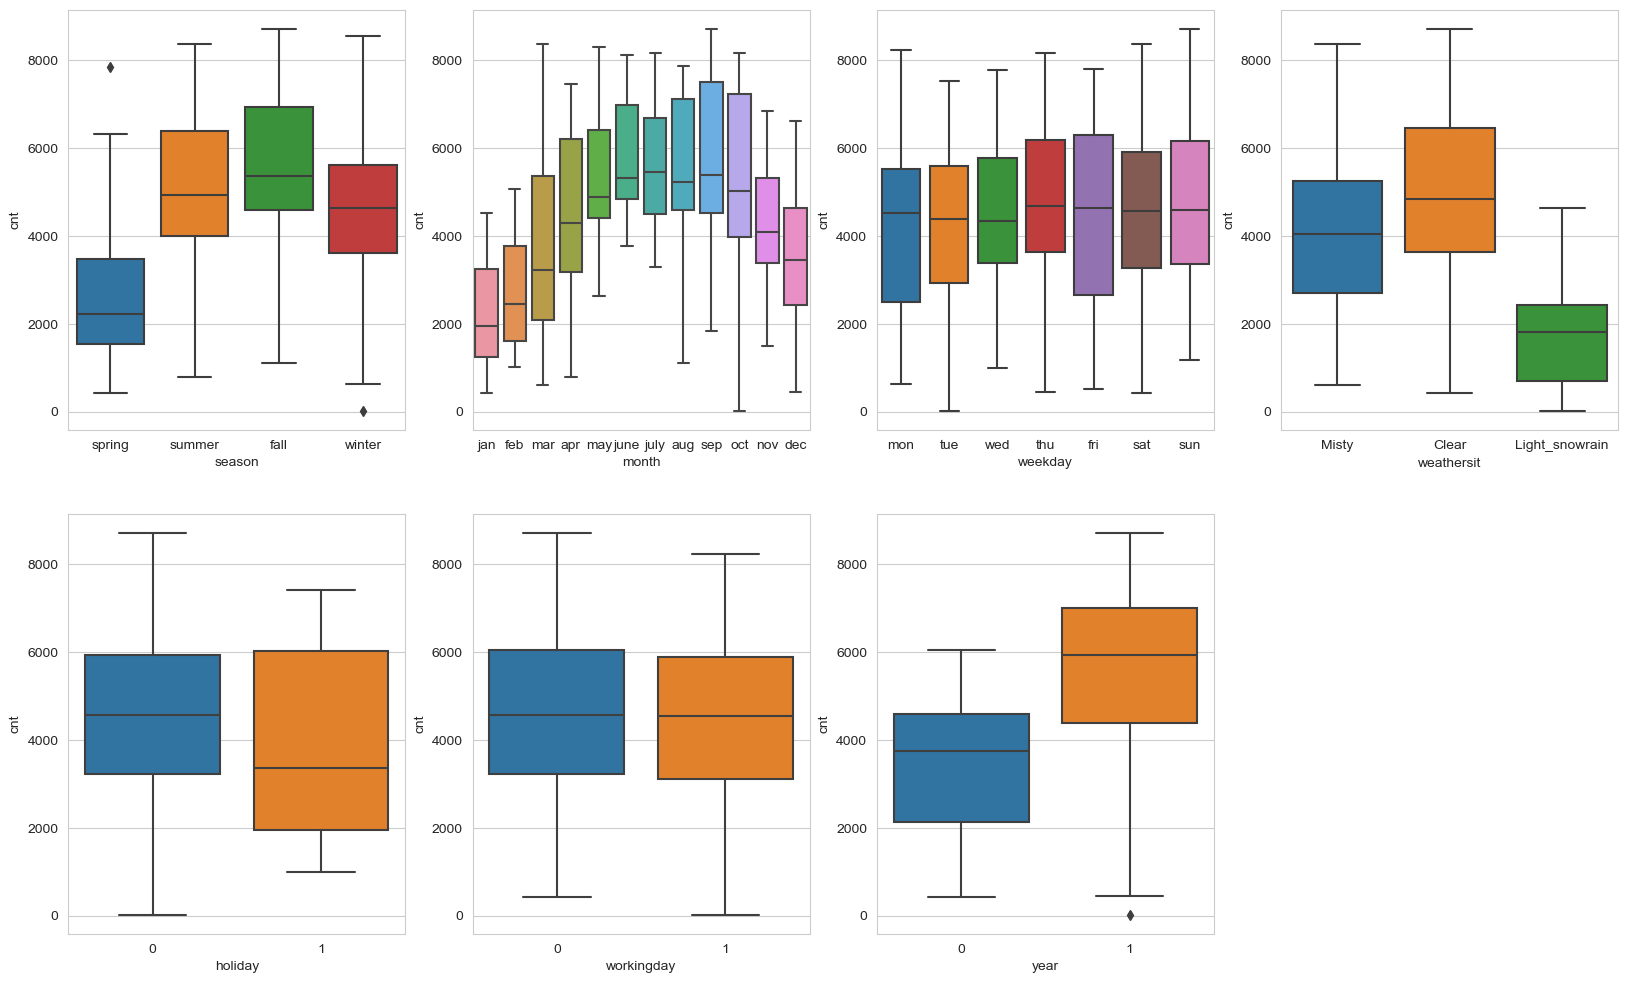

In [1045]:
# visualizing the categorical columns
#This is a common step in exploratory data analysis (EDA) to gain insights into  
#how different categorical variables affect the distribution of the target variable.
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [1046]:
#Visualising Bar Plot on Categorical Columns

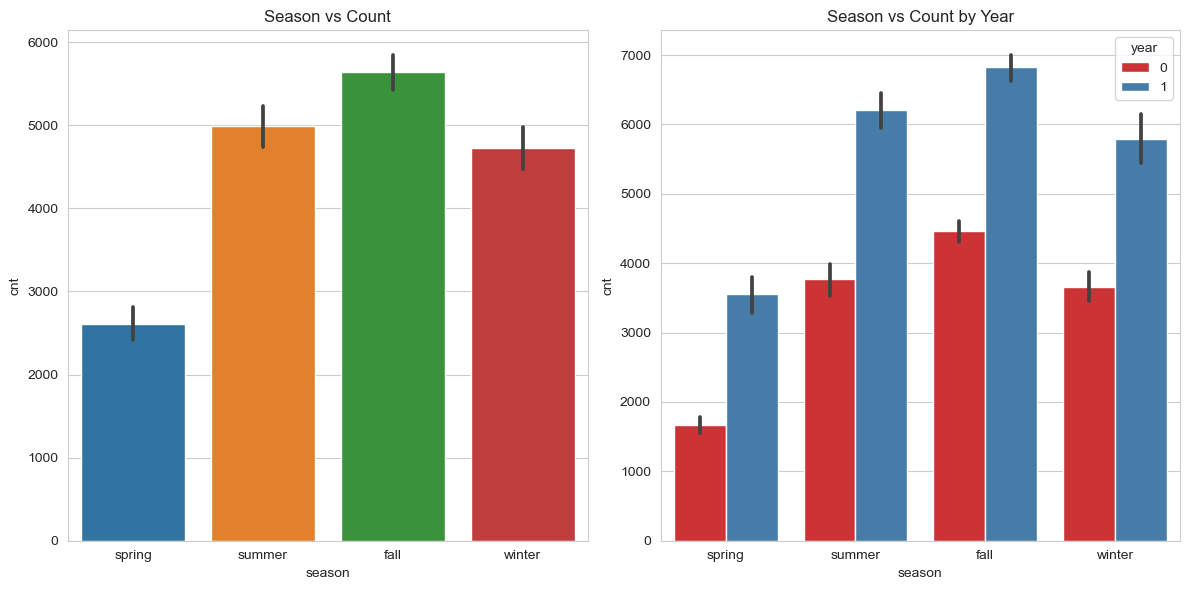

In [1047]:

# Function to create barplots for categorical columns
def plot_cat_columns(column):
    plt.figure(figsize=(12, 6))

    # First subplot: Barplot without hue
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=df)
    plt.title(f'{column.capitalize()} vs Count')

    # Second subplot: Barplot with hue as 'year'
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=df, hue='year', palette='Set1')
    plt.title(f'{column.capitalize()} vs Count by Year')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

# Ensure 'year' column is a string or category type to avoid legend issues
df['year'] = df['year'].astype(str)

# call
plot_cat_columns('season')



The fall season appears to have drawn the most bookings, with a significant increase in 
booking counts across all seasons from 2018 to 2019.

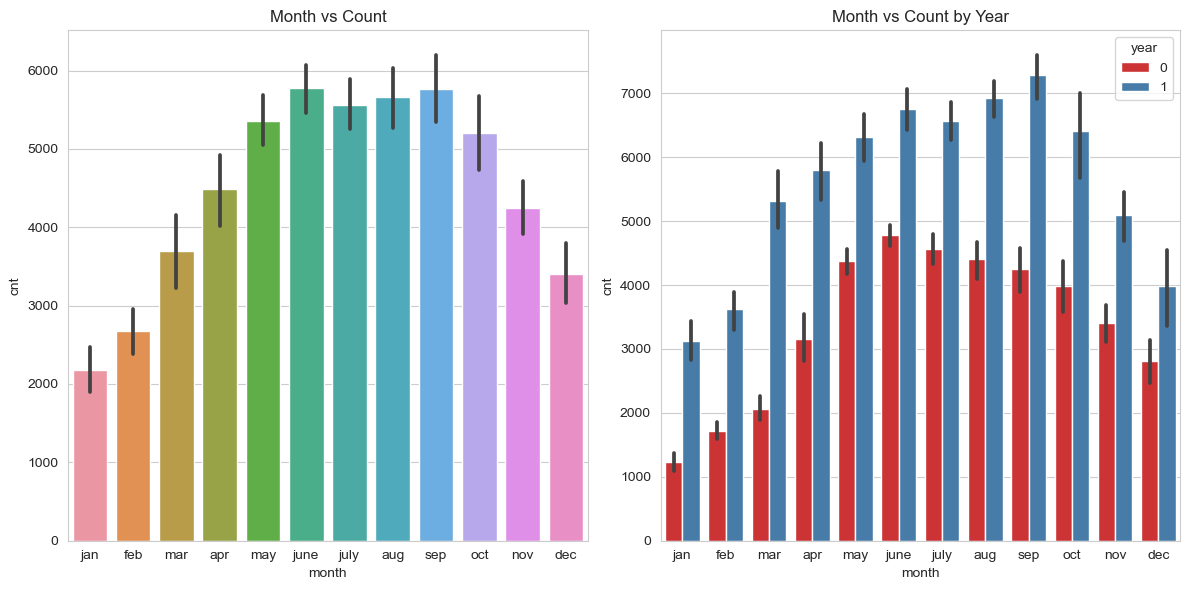

In [1049]:
#visualization for month column

plot_cat_columns('month')


The majority of bookings occurred in May, June, July, August, September, and October. The trend showed an upward rise from the beginning of the year until mid-year, followed by a decline toward the year's end. Additionally, the number of bookings appears to have grown for each month from 2018 to 2019.

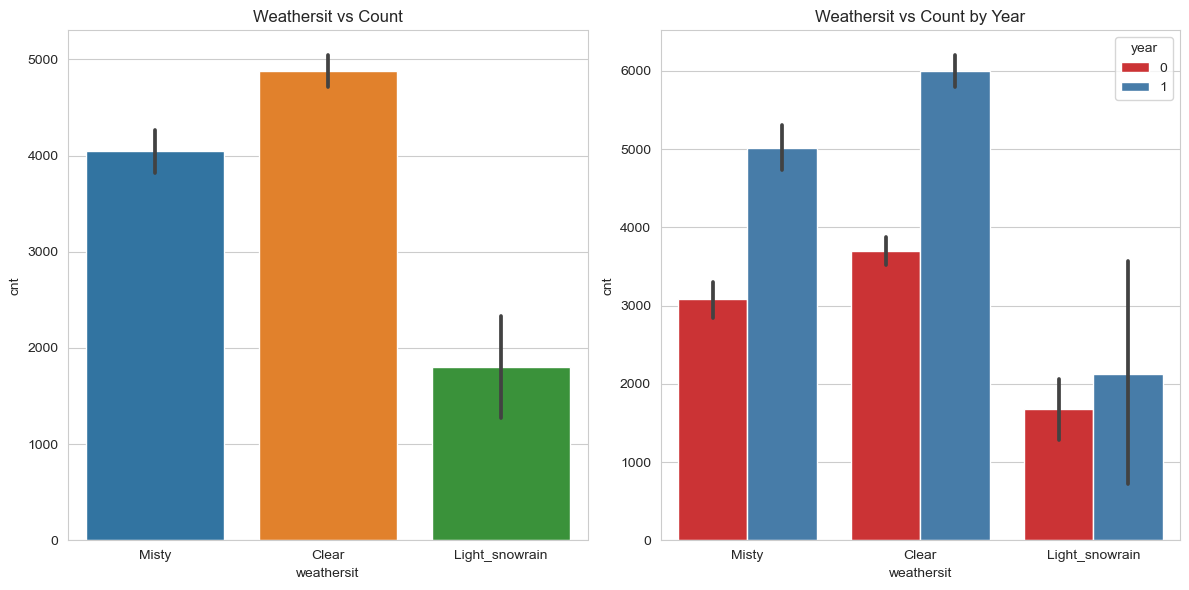

In [1051]:
#visualization for weathersit column

plot_cat_columns('weathersit')

It's evident that clear weather led to more bookings. Furthermore, compared to the previous year, 2018, bookings increased for every weather condition in 2019.

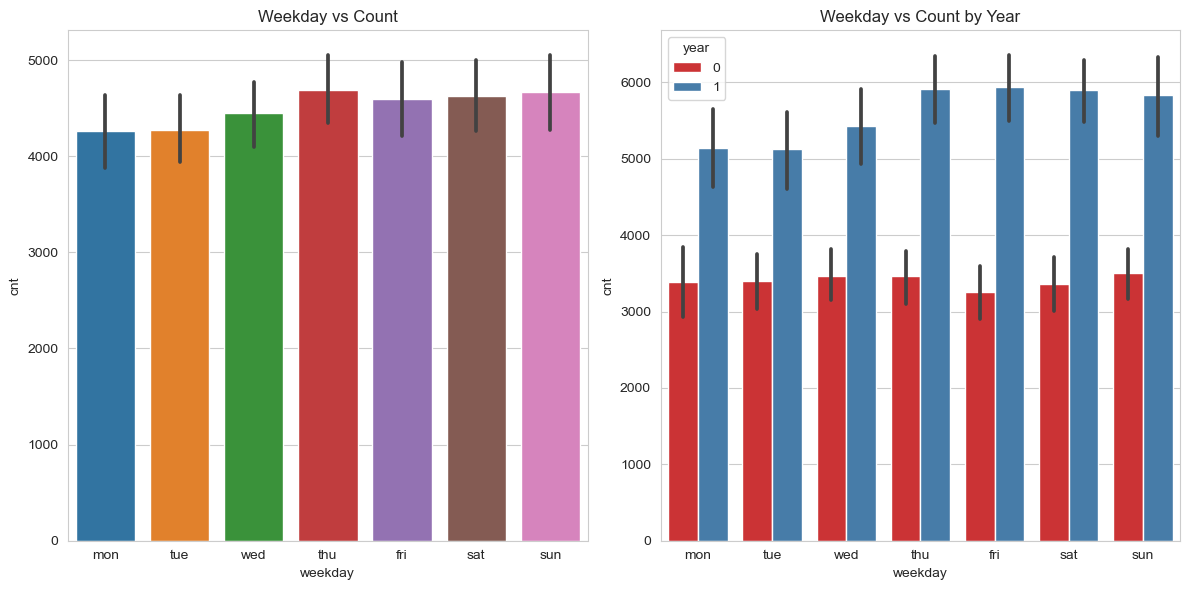

In [1053]:
#visualization for weekday column

plot_cat_columns('weekday')

Thursday, Friday, Saturday, and Sunday saw a higher number of bookings compared to the earlier days of the week.

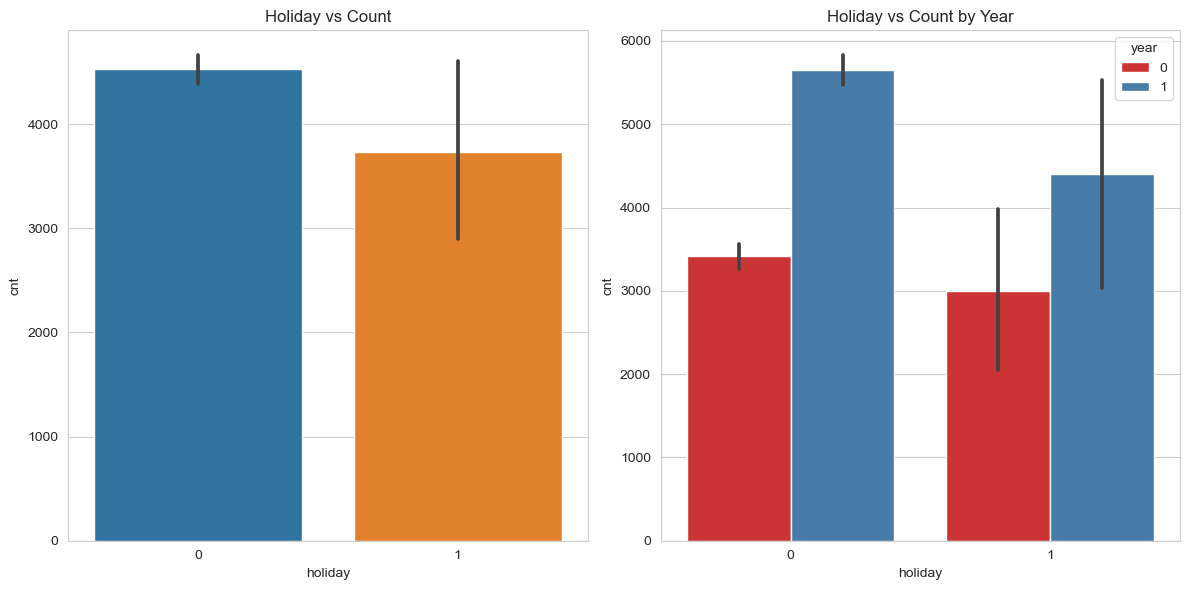

In [1055]:
#visualization for holiday column

plot_cat_columns('holiday')

When it’s not a holiday, bookings tend to be lower, which makes sense, as people often prefer to stay home and enjoy time with their families during holidays.

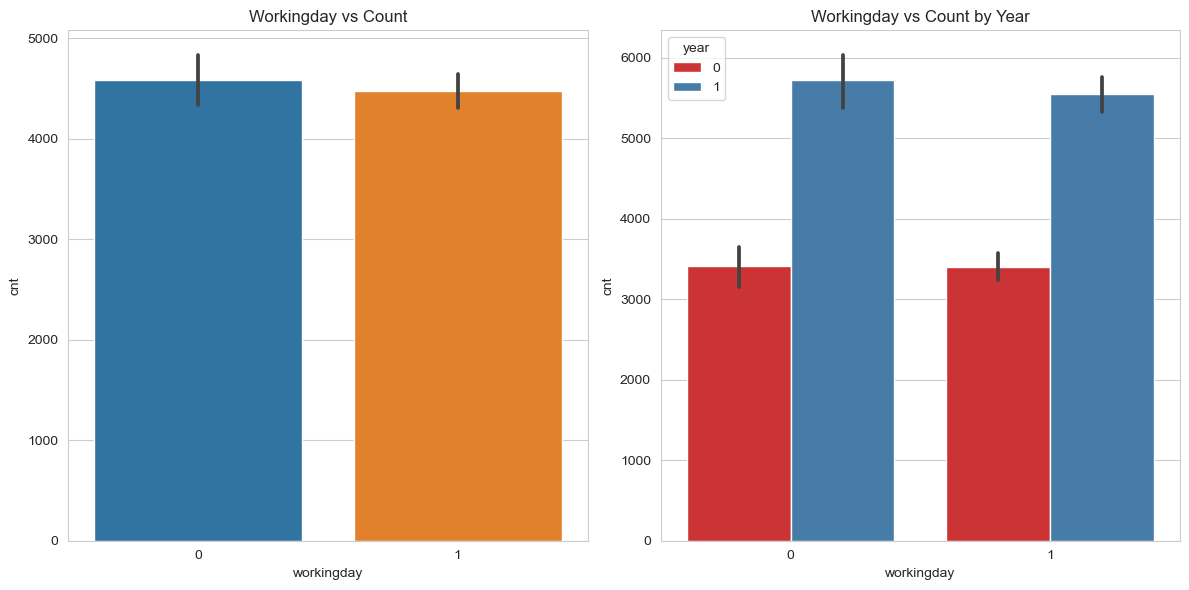

In [1057]:
#visualization for workingday column

plot_cat_columns('workingday')


Bookings appeared to be nearly the same on both working days and non-working days; however, the overall count rose from 2018 to 2019.

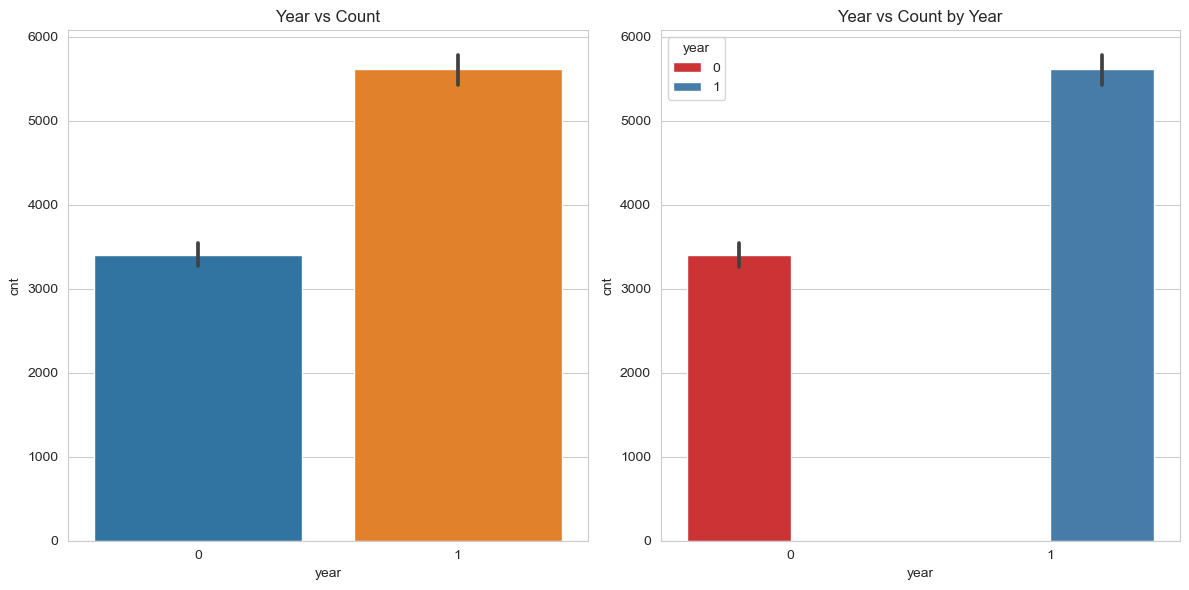

In [1059]:
#visualization for year column

plot_cat_columns('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

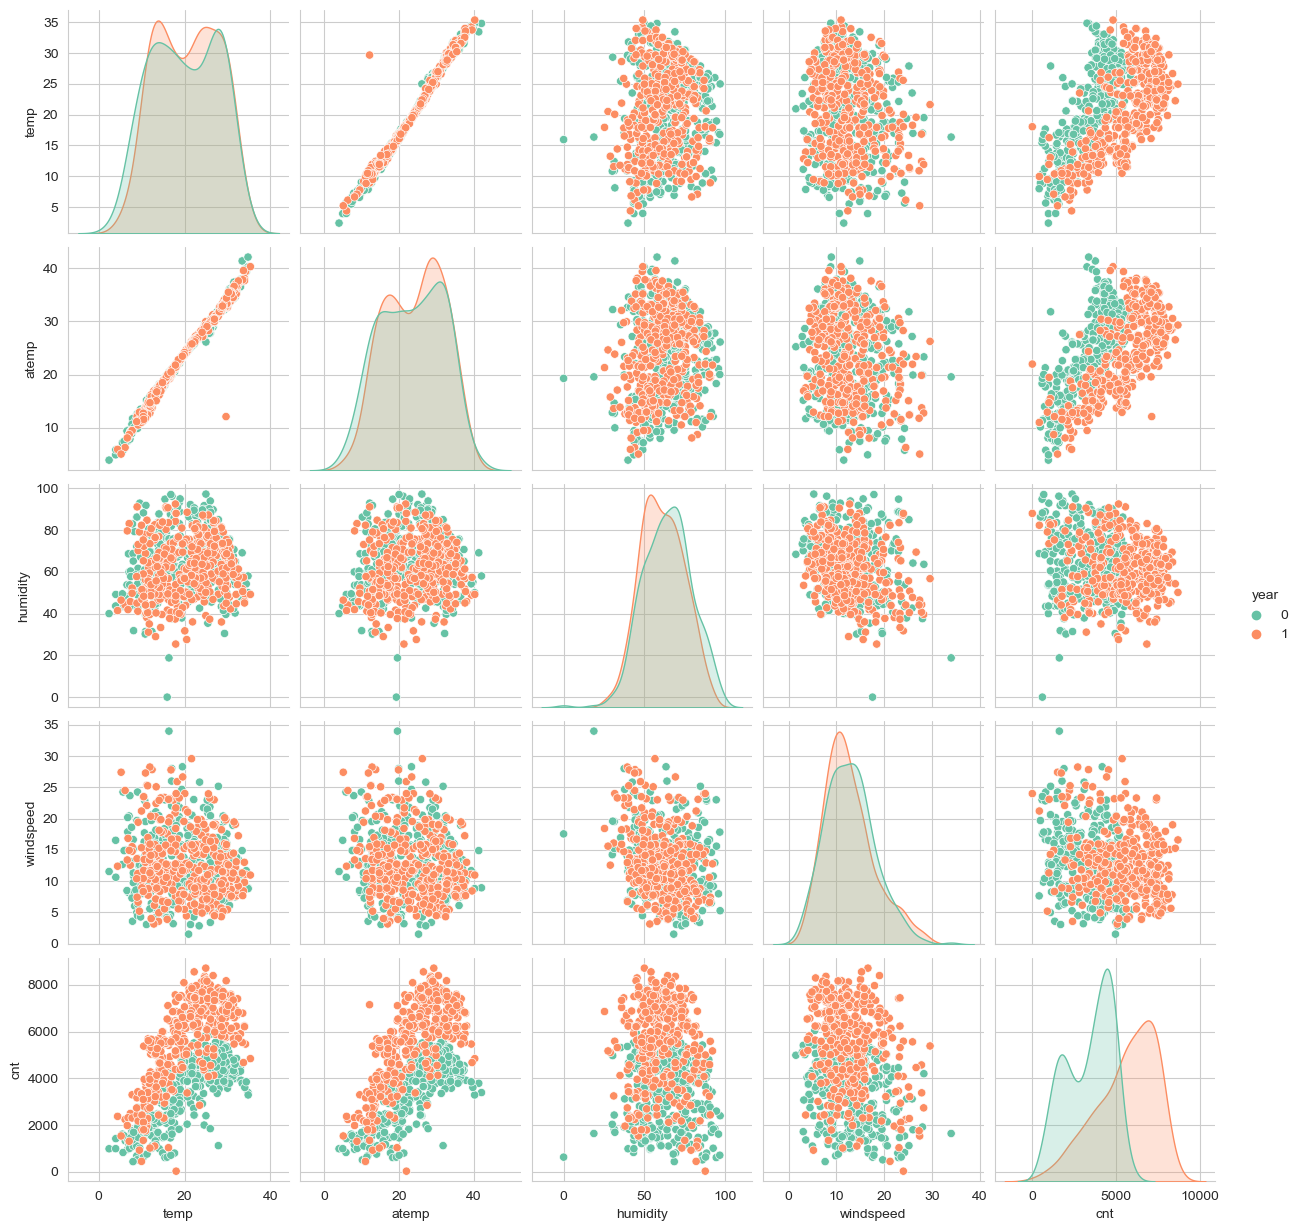

In [1061]:
#Visualising Numerical Columns
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the pairplot with a hue
sns.pairplot(data=df, vars=['temp', 'atemp', 'humidity', 'windspeed', 'cnt'], hue='year', palette='Set2')
plt.show()

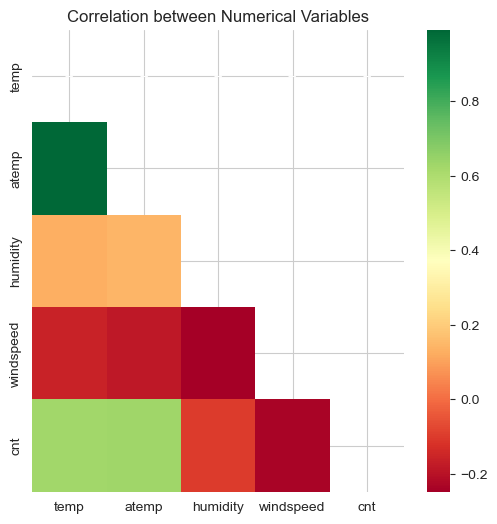

In [1062]:
# Checking the correlation between the numerical variables
plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is a linear relationship between temperature and apparent temperature (atemp). Due to multicollinearity, both variables cannot be included in the model. We will determine which variables to retain by evaluating the Variance Inflation Factor (VIF) and the p-values in relation to the other variables.

DATA PREPARATION

In [1065]:
##creating dummy variables for month, weekday, weather situation, and season is a crucial preprocessing step that transforms categorical data
##into a suitable numerical format for analysis, improves model interpretability and performance, and avoids issues related to multicollinearity.

In [1066]:
# Dummy variable creation for month, weekday, weathersit and season variables.
months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [1067]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1074]:
# Merging  the dataframe and dummy variable dataset. 
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [1083]:
#View the changes
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,False,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,False,False,False,True,False,False,True,True,False,False
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,True,False,False,True,False,False
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,False,False,True,False,False,False,False,True,False,False
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,False,True,False,False


In [1090]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    object 
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

In [1097]:
#Drop unwanted columns with categorical variables
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [1098]:
#View the changes
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,False,False,False,True,True,False,False
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,True,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,True,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,False,False,False,True,False,False


In [1099]:

# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    object 
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

In [1100]:
# Convert all boolean columns to uint8
bool_cols = df_new.select_dtypes(include='bool').columns  # Select columns of type bool
df_new[bool_cols] = df_new[bool_cols].astype('uint8')  # Convert to uint8
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    object 
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

In [1102]:
print(df.dtypes)

season         object
year           object
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
humidity      float64
windspeed     float64
cnt             int64
dtype: object


TRAINING AND TESTING SETS

In [1105]:
# splitting the dataframe into Train and Test
#70 % for taining 30% for testing
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [1106]:
#CHecking shape of training dataset
df_train.shape

(510, 30)

In [1107]:
# check the shape of testing datatset
df_test.shape

(220, 30)

In [1108]:
# Rescaling using MinMaxscaler the features
scaler = MinMaxScaler()

In [1109]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1110]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1111]:
# verifying the head after appying scaling.
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


In [1112]:
# describing the dataset

df_train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


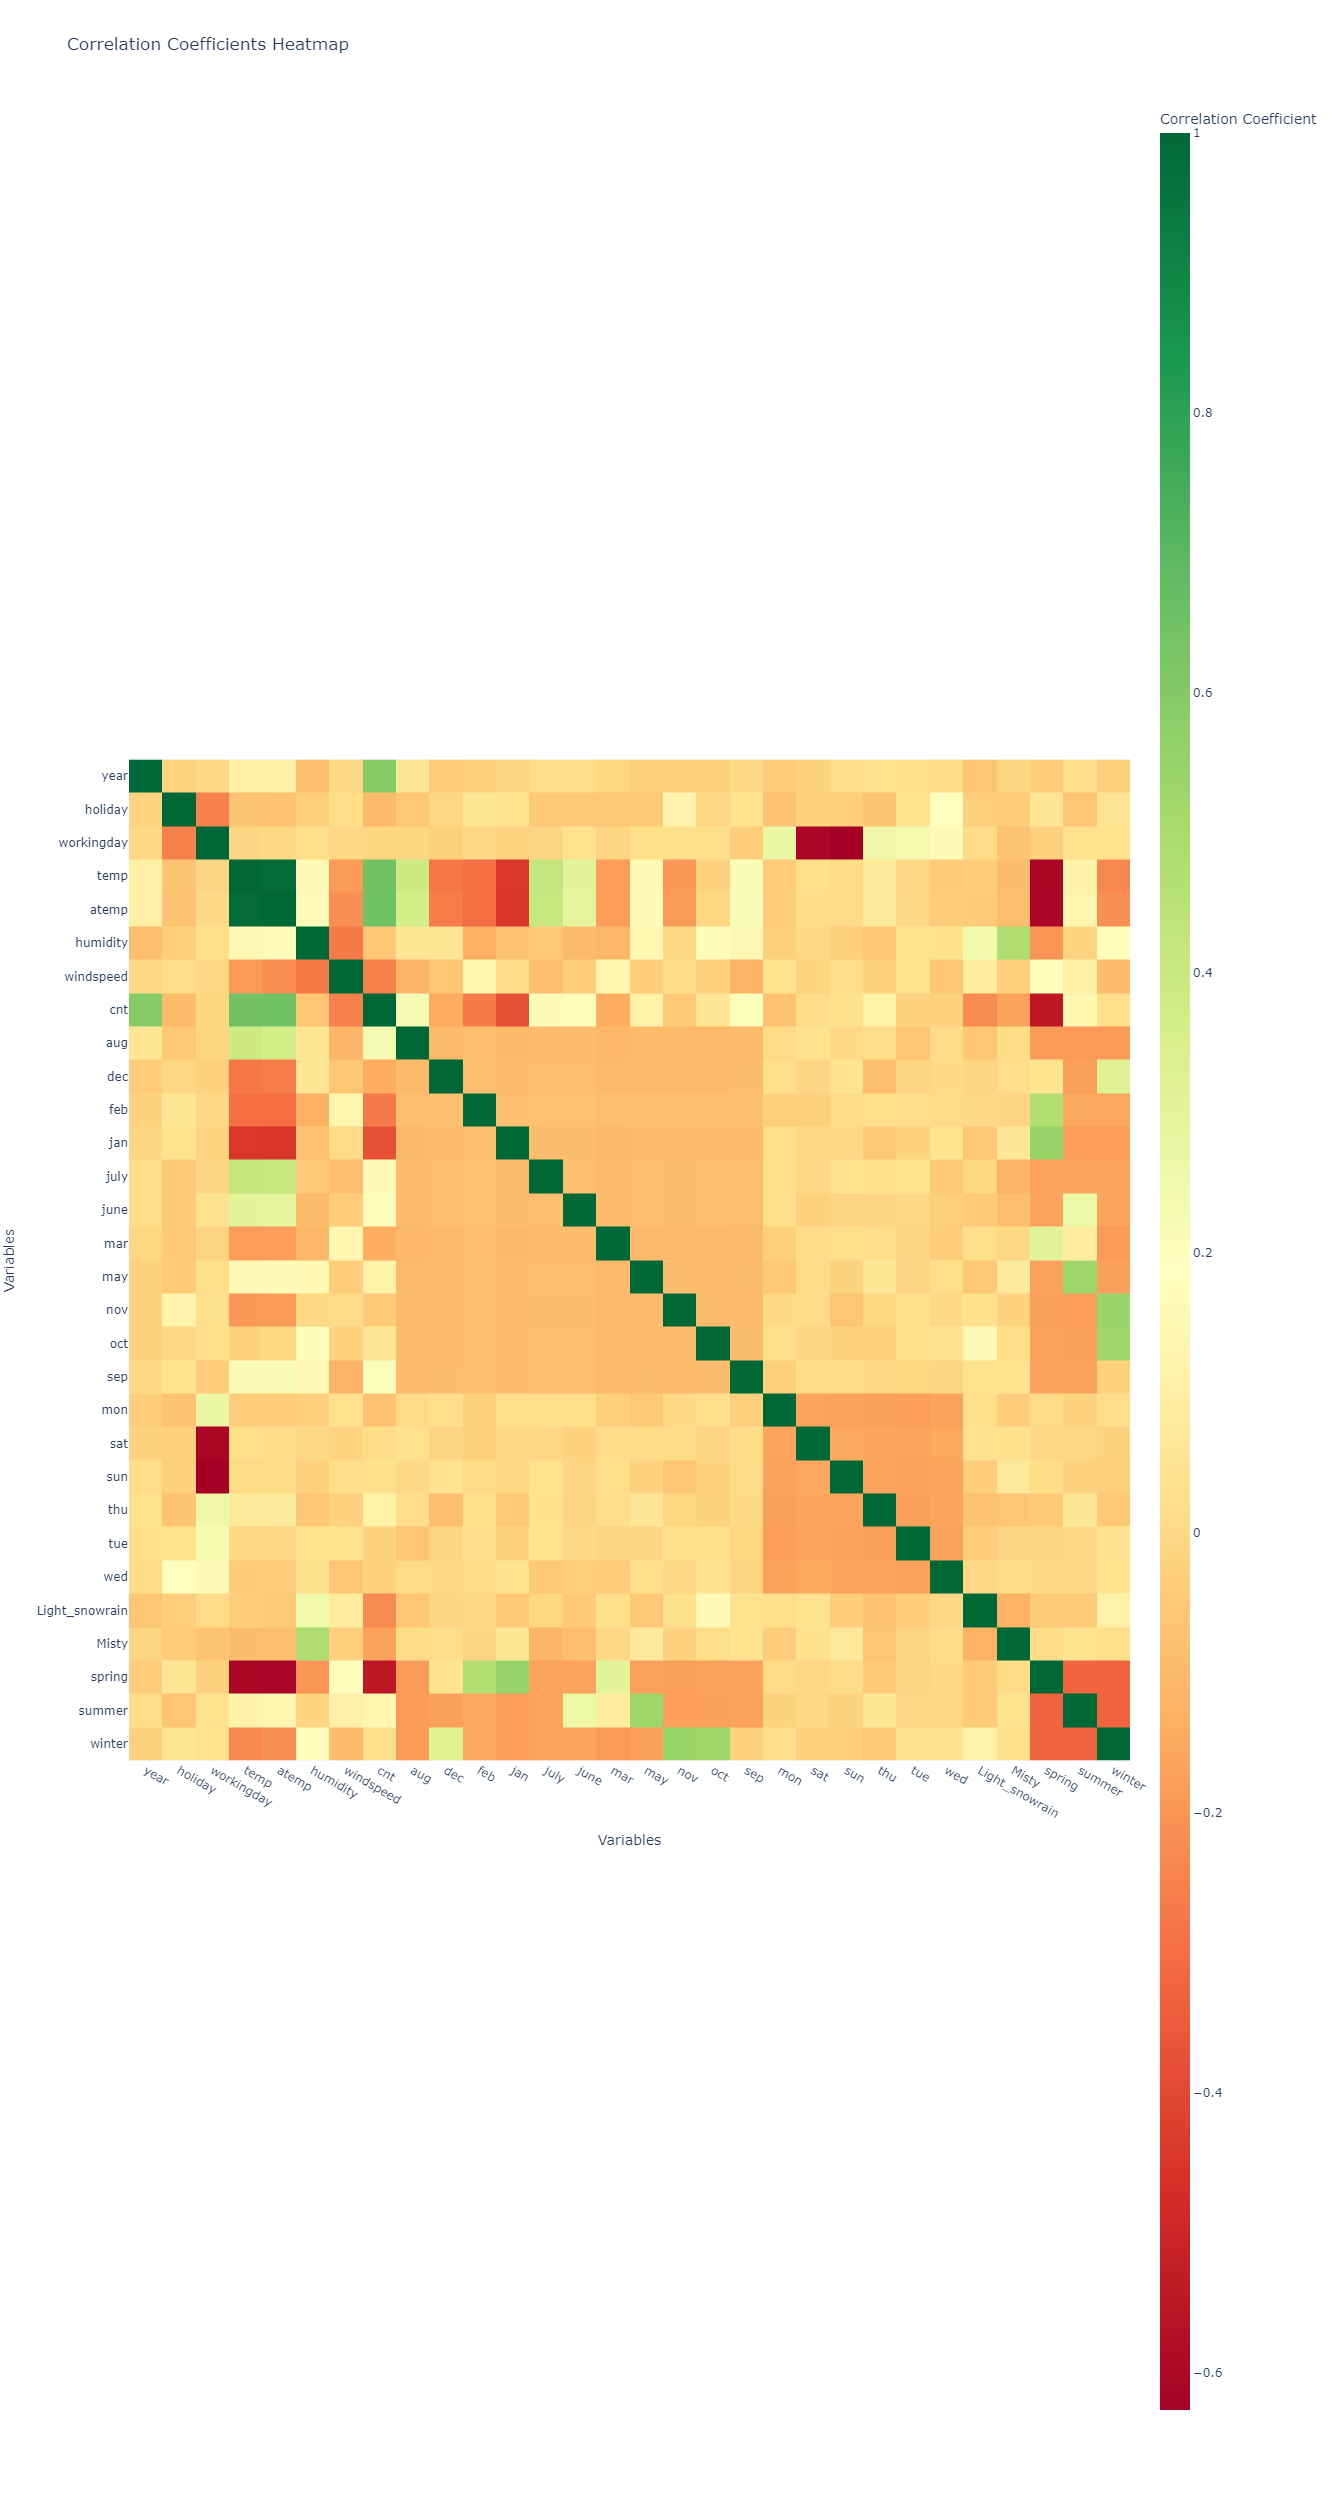

In [1113]:
# Calculate correlation matrix
import plotly.express as px
corr_matrix = df_train.corr()

# Create an interactive heatmap using Plotly
fig = px.imshow(corr_matrix, 
                color_continuous_scale='RdYlGn', 
                title='Correlation Coefficients Heatmap',
                labels=dict(x="Variables", y="Variables", color="Correlation Coefficient"))
 #Update the layout to set the figure size
fig.update_layout(width=2500, height=2500) 
# Show the plot
fig.show()

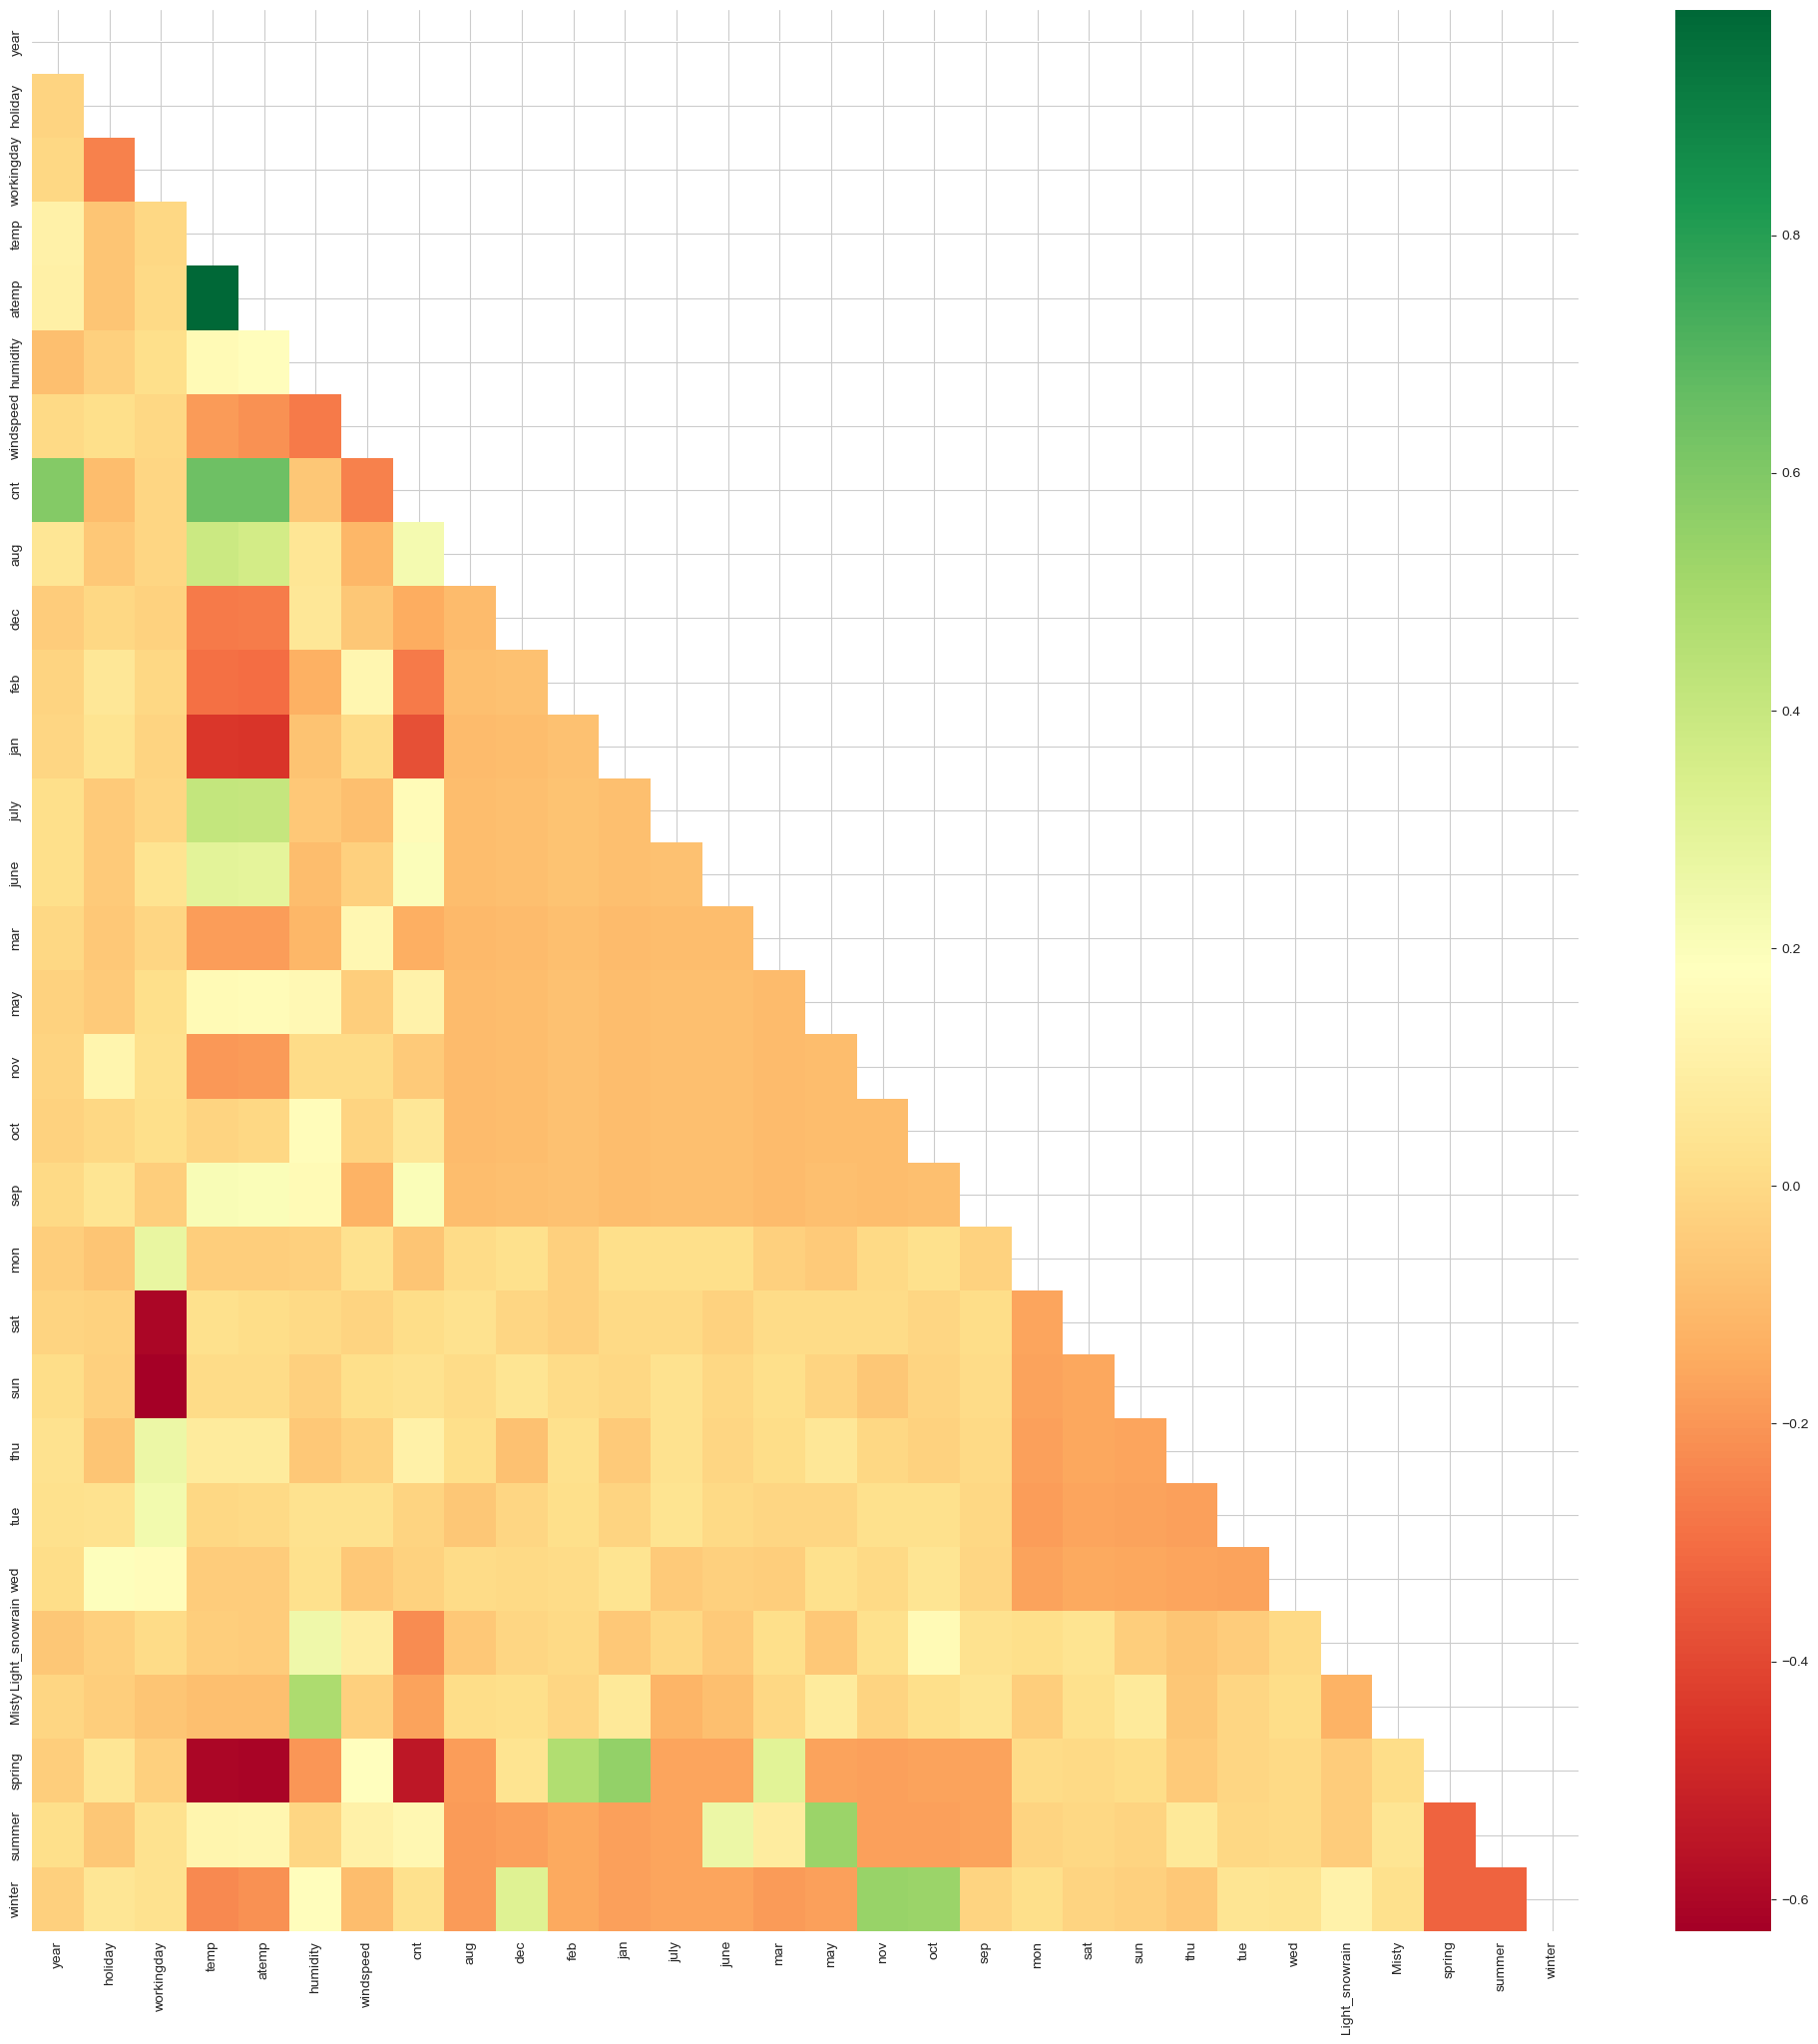

In [1114]:
# check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

WE CONSIDERED THE BOXES WITH GREEN
The variable cnt appears to be correlated with both the year and temp variables. Additionally, Misty is correlated with humidity. The Spring season shows a strong correlation with January and February, while the Summer season is notably correlated with May. Similarly, the Winter season exhibits a good correlation with October and November.

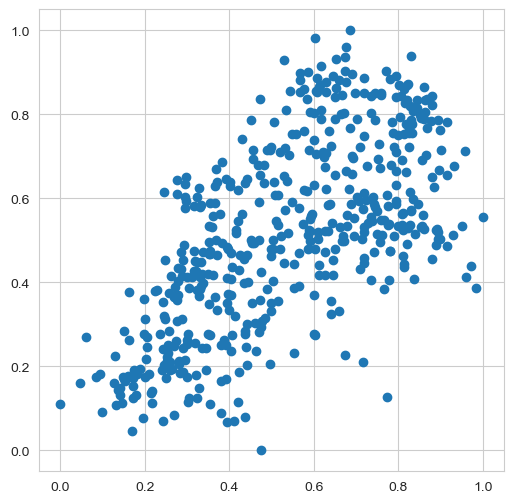

In [1116]:
# Visualizing one of the correlation

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [1119]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [1121]:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create a linear regression model
lm = LinearRegression()

# Fit the model first
lm.fit(X_train, y_train)

# Initialize RFE with the model and the desired number of features to select
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the ranking of the features
ranking = rfe.ranking_

# Print the ranking
print(ranking)


[ 1  1  4  1  3  1  1 10  1  2  1  1 12 15  9  1 13  1  8  5  6 14  7 11
  1  1  1  1  1]


In [1123]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [1125]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [1126]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [1128]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1129]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [1130]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculateVIF(df):
    # Ensure only numeric columns are selected
    numeric_df = df.select_dtypes(include=[np.number])
    
    vif = pd.DataFrame()
    vif['Features'] = numeric_df.columns
    vif['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)

    return vif

# Calculate VIF for the selected features
vif_results = calculateVIF(X_train_rfe)
print(vif_results)


          Features    VIF
2         humidity  30.67
1             temp  16.65
3        windspeed   4.72
11          spring   4.28
13          winter   4.01
12          summer   2.79
10           Misty   2.32
7              nov   1.84
5              jan   1.74
6             july   1.59
4              dec   1.55
8              sep   1.41
9   Light_snowrain   1.28
0          holiday   1.06


Build Linear Model

In [1132]:
#model 1

import pandas as pd
import statsmodels.api as sm

# Assuming X_train_rfe and y_train are already defined
X_train_lm_1 = X_train_rfe.copy()

# Check data types
print(X_train_lm_1.dtypes)
print(y_train.dtypes)

# Convert to numeric (if needed)
X_train_lm_1 = X_train_lm_1.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Drop NaN values
X_train_lm_1 = X_train_lm_1.dropna()
y_train = y_train[X_train_lm_1.index]  # Align y_train with X_train_lm_1

# Add constant
X_train_lm_1 = sm.add_constant(X_train_lm_1)

# Fit the model
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()
print(lr_1.summary())


year               object
holiday             int64
temp              float64
humidity          float64
windspeed         float64
dec                 uint8
jan                 uint8
july                uint8
nov                 uint8
sep                 uint8
Light_snowrain      uint8
Misty               uint8
spring              uint8
summer              uint8
winter              uint8
dtype: object
float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          8.15e-189
Time:                        23:25:53   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     4

In [1133]:

# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.66
1,temp,4.57
12,winter,2.93
10,spring,2.85
11,summer,2.23
6,nov,1.81
4,jan,1.65
5,july,1.59
9,Misty,1.57
3,dec,1.47


VIF looks but we try to reduce

In [1135]:
import pandas as pd
import statsmodels.api as sm

# Assuming X_train_new and y_train are already defined
# Make sure all values in X_train_new are numeric
X_train_lm_2 = X_train_new.apply(pd.to_numeric, errors='coerce')

# Check if any columns have non-numeric values
non_numeric_columns = X_train_lm_2.columns[X_train_lm_2.isnull().any()].tolist()
if non_numeric_columns:
    print(f"Warning: The following columns contain non-numeric values: {non_numeric_columns}")

# Drop NaN values from X_train_lm_2
X_train_lm_2 = X_train_lm_2.dropna()

# Align y_train with the cleaned X_train_lm_2
y_train = y_train[X_train_lm_2.index]

# Check if y_train has any NaN values after alignment
if y_train.isnull().sum() > 0:
    print("Warning: y_train contains NaN values after alignment.")
    y_train = y_train.dropna()  # Drop NaNs in y_train if any

# Add constant to the model
X_train_lm_2 = sm.add_constant(X_train_lm_2)

# Fit the model
try:
    lr_2 = sm.OLS(y_train, X_train_lm_2).fit()
    print("\nModel 2 Summary:")
    print(lr_2.summary())
except Exception as e:
    print(f"An error occurred: {e}")



Model 2 Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          4.75e-186
Time:                        23:25:53   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450 

In [1136]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.61
1,temp,4.55
9,spring,2.85
10,summer,2.23
11,winter,2.03
4,jan,1.65
5,july,1.59
8,Misty,1.57
6,sep,1.34
3,dec,1.29


THERE IS NO BIG DIFFERENCE IN THE VIF 

In [1138]:
import pandas as pd
import statsmodels.api as sm

# Assuming X_train_new and y_train are already defined

# Make sure all values in X_train_new are numeric
X_train_lm_3 = X_train_new.apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_columns = X_train_lm_3.columns[X_train_lm_3.isnull().any()].tolist()
if non_numeric_columns:
    print(f"Warning: The following columns contain non-numeric values: {non_numeric_columns}")

# Drop NaN values from X_train_lm_3
X_train_lm_3 = X_train_lm_3.dropna()

# Align y_train with the cleaned X_train_lm_3
y_train = y_train[X_train_lm_3.index]

# Check if y_train has any NaN values after alignment
if y_train.isnull().sum() > 0:
    print("Warning: y_train contains NaN values after alignment.")
    y_train = y_train.dropna()  # Drop NaNs in y_train if any

# Add constant to the model
X_train_lm_3 = sm.add_constant(X_train_lm_3)

# Fit the model
try:
    lr_3 = sm.OLS(y_train, X_train_lm_3).fit()
    print("\nModel 3 Summary:")
    print(lr_3.summary())
except Exception as e:
    print(f"An error occurred: {e}")



Model 3 Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          2.74e-186
Time:                        23:25:53   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283 

In [1139]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.61
1,temp,4.54
8,spring,2.71
9,summer,2.23
10,winter,1.75
3,jan,1.60
4,july,1.59
7,Misty,1.56
5,sep,1.34
6,Light_snowrain,1.08


In [1140]:
import pandas as pd
import statsmodels.api as sm

# Assuming X_train_new and y_train are already defined

# Make sure all values in X_train_new are numeric
X_train_lm_4 = X_train_new.apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_columns = X_train_lm_4.columns[X_train_lm_4.isnull().any()].tolist()
if non_numeric_columns:
    print(f"Warning: The following columns contain non-numeric values: {non_numeric_columns}")

# Drop NaN values from X_train_lm_4
X_train_lm_4 = X_train_lm_4.dropna()

# Align y_train with the cleaned X_train_lm_4
y_train = y_train[X_train_lm_4.index]

# Check if y_train has any NaN values after alignment
if y_train.isnull().sum() > 0:
    print("Warning: y_train contains NaN values after alignment.")
    y_train = y_train.dropna()  # Drop NaNs in y_train if any

# Add constant to the model
X_train_lm_4 = sm.add_constant(X_train_lm_4)

# Fit the model
try:
    lr_4 = sm.OLS(y_train, X_train_lm_4).fit()
    print("\nModel 4 Summary:")
    print(lr_4.summary())
except Exception as e:
    print(f"An error occurred: {e}")



Model 4 Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          8.14e-187
Time:                        23:25:53   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154 

In [1141]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.59
1,temp,4.52
8,summer,2.21
7,spring,2.02
9,winter,1.75
3,july,1.58
6,Misty,1.55
4,sep,1.34
5,Light_snowrain,1.08
0,holiday,1.04


In [1142]:
import pandas as pd
import statsmodels.api as sm

# Assuming X_train_new and y_train are already defined

# Make sure all values in X_train_new are numeric
X_train_lm_5 = X_train_new.apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_columns = X_train_lm_5.columns[X_train_lm_5.isnull().any()].tolist()
if non_numeric_columns:
    print(f"Warning: The following columns contain non-numeric values: {non_numeric_columns}")

# Drop NaN values from X_train_lm_5
X_train_lm_5 = X_train_lm_5.dropna()

# Align y_train with the cleaned X_train_lm_5
y_train = y_train[X_train_lm_5.index]

# Check if y_train has any NaN values after alignment
if y_train.isnull().sum() > 0:
    print("Warning: y_train contains NaN values after alignment.")
    y_train = y_train.dropna()  # Drop NaNs in y_train if any

# Add constant to the model
X_train_lm_5 = sm.add_constant(X_train_lm_5)

# Fit the model
try:
    lr_5 = sm.OLS(y_train, X_train_lm_5).fit()
    print("\nModel 5 Summary:")
    print(lr_5.summary())
except Exception as e:
    print(f"An error occurred: {e}")



Model 5 Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          5.06e-187
Time:                        23:25:54   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994 

In [1143]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.59
1,temp,3.29
6,spring,1.93
7,summer,1.89
8,winter,1.60
5,Misty,1.55
3,sep,1.23
4,Light_snowrain,1.08
0,holiday,1.04


In [1144]:
import pandas as pd
import statsmodels.api as sm

# Assuming X_train_new and y_train are already defined

# Make sure all values in X_train_new are numeric
X_train_lm_6 = X_train_new.apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_columns = X_train_lm_6.columns[X_train_lm_6.isnull().any()].tolist()
if non_numeric_columns:
    print(f"Warning: The following columns contain non-numeric values: {non_numeric_columns}")

# Drop NaN values from X_train_lm_6
X_train_lm_6 = X_train_lm_6.dropna()

# Align y_train with the cleaned X_train_lm_6
y_train = y_train[X_train_lm_6.index]

# Check if y_train has any NaN values after alignment
if y_train.isnull().sum() > 0:
    print("Warning: y_train contains NaN values after alignment.")
    y_train = y_train.dropna()  # Drop NaNs in y_train if any

# Add constant to the model
X_train_lm_6 = sm.add_constant(X_train_lm_6)

# Fit the model
try:
    lr_6 = sm.OLS(y_train, X_train_lm_6).fit()
    print("\nModel 6 Summary:")
    print(lr_6.summary())
except Exception as e:
    print(f"An error occurred: {e}")



Model 6 Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          1.47e-186
Time:                        23:25:54   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909 

There are several reasons to consider Model 6 as a good model. Here's a breakdown of key statistics and what they imply about the model's performance:

R-squared and Adjusted R-squared:

R-squared (0.833): This indicates that approximately 83.3% of the variability in the dependent variable (cnt, which likely represents count or demand) can be explained by the independent variables in the model. This is a strong indication that the model fits the data well.
Adjusted R-squared (0.829): This metric accounts for the number of predictors in the model and provides a more accurate measure when comparing models with different numbers of independent variables. An adjusted R-squared close to the R-squared indicates that the additional predictors are contributing to the model without overfitting.
F-statistic and p-value:

F-statistic (248.4): This is a measure of the overall significance of the model. A higher F-statistic value suggests that at least one of the predictors is significantly associated with the dependent variable.
Prob (F-statistic) (1.47e-186): The p-value associated with the F-statistic is extremely low (close to 0), indicating strong evidence against the null hypothesis that all regression coefficients are equal to zero. This means the model is statistically significant.
Coefficients and p-values:

Each coefficient represents the expected change in the dependent variable for a one-unit change in the predictor variable, holding all other variables constant.
All predictors (e.g., year, temp, holiday, etc.) have low p-values (all < 0.05), indicating that these predictors are statistically significant in explaining the variance in cnt.
For example, the coefficient for temp is 0.4777, suggesting that for each unit increase in temperature, the count increases by approximately 0.478, which is a meaningful impact.
Durbin-Watson Statistic:

Durbin-Watson (2.085): This statistic tests for autocorrelation in the residuals. Values close to 2 indicate no autocorrelation. A value of 2.085 suggests that there is no significant autocorrelation in the residuals, which is a positive sign for the validity of the model.
Residual Analysis:

Omnibus Test and Jarque-Bera Test: Both tests show significant p-values, suggesting that the residuals are not normally distributed. However, the skewness and kurtosis values indicate some deviation from normality, which might be acceptable depending on the context of the data.
You may consider plotting the residuals to further assess their distribution and check for homoscedasticity.
Individual Variable Significance:

The coefficients for seasonal variables (like spring, summer, winter, etc.) and other factors like Light_snowrain and Misty show how these variables impact the count, providing useful insights into seasonality and weather effects.
Conclusion
Overall, Model 6 demonstrates strong statistical significance, a high proportion of explained variance, and meaningful coefficients that suggest practical implications. It provides a solid basis for understanding the factors influencing the count variable. However, always consider further validation with residual analysis, cross-validation, and potentially testing with new data to ensure robustness before final conclusions.

In [1146]:
X_train_lm_6

,const,year,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [1147]:
y_train_pred = lr_6.predict(X_train_lm_6)

In [1148]:
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.59
1,temp,3.29
6,spring,1.93
7,summer,1.89
8,winter,1.60
5,Misty,1.55
3,sep,1.23
4,Light_snowrain,1.08
0,holiday,1.04


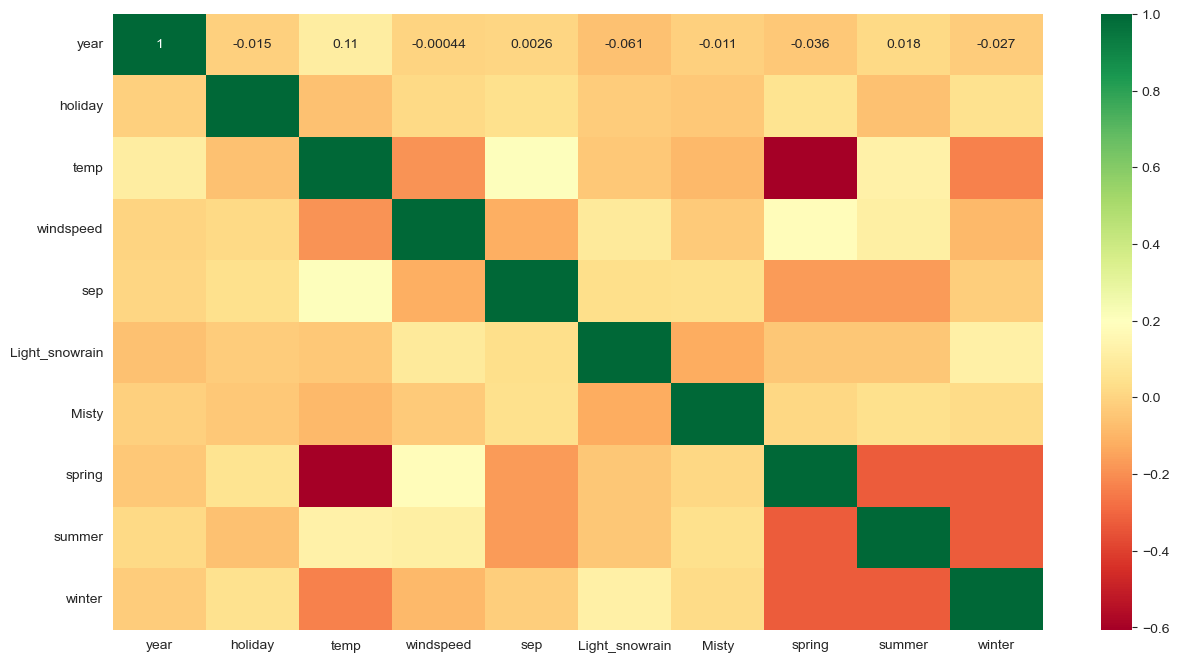

In [1149]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

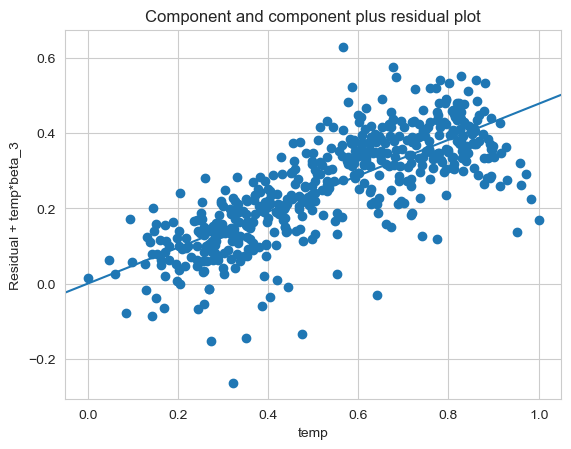

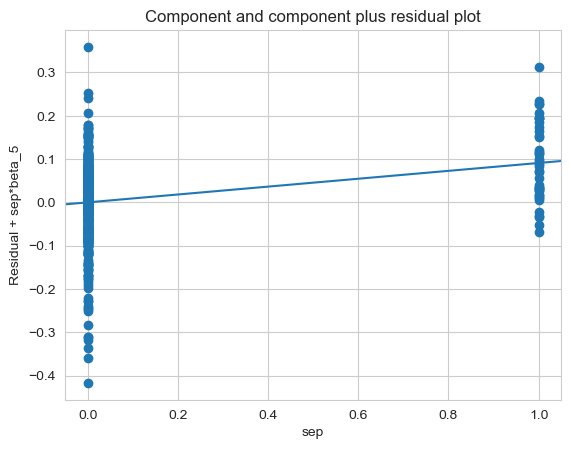

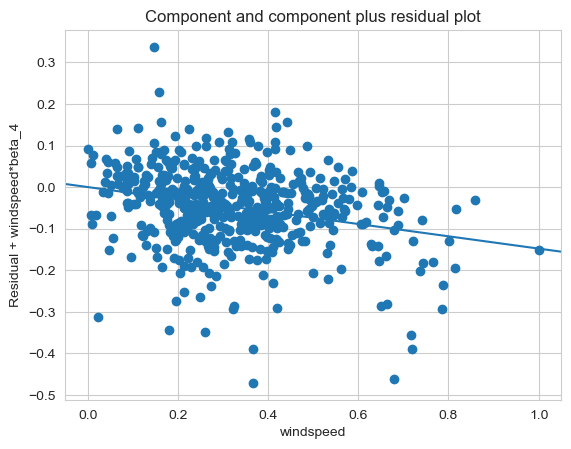

In [1150]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

PREDICTIONS

In [1152]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [1154]:
df_test.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1158]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1160]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [1161]:
import pandas as pd
import statsmodels.api as sm

# Assuming X_test_lm_6 is your test DataFrame

# Convert all columns to numeric
X_test_lm_6 = X_test_lm_6.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
X_test_lm_6 = X_test_lm_6.dropna()

# Add constant to the test dataset
X_test_lm_6 = sm.add_constant(X_test_lm_6)

# Ensure that the test set has the same columns as the training set
X_test_lm_6 = X_test_lm_6[X_train_lm_6.columns]

# Make predictions
y_pred = lr_6.predict(X_test_lm_6)

# Print predictions
print(y_pred)


184    0.400699
535    0.894906
299    0.401679
221    0.561750
152    0.563769
         ...   
702    0.725548
127    0.521945
640    0.789203
72     0.263720
653    0.718507
Length: 220, dtype: float64


In [1163]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

EVALUTION OF MODEL

Text(0, 0.5, 'y_pred')

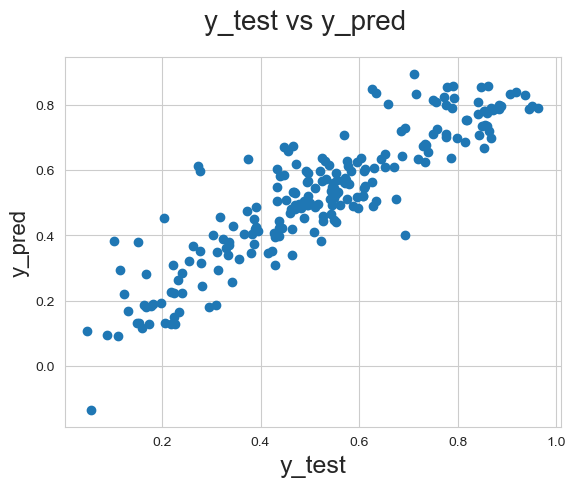

In [1166]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [1167]:
round(lr_6.params,4)

const             0.1909
year              0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
spring           -0.0554
summer            0.0621
winter            0.0945
dtype: float64

In [1169]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.7944

Conclusion
Comparison of Training and Testing Datasets
Training Dataset R²: 0.833
This value indicates that approximately 83.3% of the variability in bike demand is explained by the model when trained on the training dataset.

Testing Dataset R²: 0.8038
This indicates that about 80.4% of the variability in bike demand is explained when the model is applied to the test dataset.

Training Adjusted R²: 0.829
This indicates that the model explains a significant portion of variability even after adjusting for the number of features.

Testing Adjusted R²: 0.7944
A slightly lower value indicates that some predictors may not perform as well on unseen data, which is common in regression models.

The R² values for both the training and testing datasets suggest that the model is performing well. A high R² indicates a good fit on the training data, while the testing R², though slightly lower, still reflects strong explanatory power, indicating reasonable generalization to unseen data.

Key Variables Influencing Bike Demand
Several important variables have been identified as significant predictors of bike rental demand, including:

Year
Holiday
Temperature
Windspeed
Month Indicators (e.g., September)
Weather Conditions (e.g., Light Snow Rain, Misty)
Seasons (e.g., Spring, Summer, Winter)
Understanding these factors can aid in making informed decisions about inventory and marketing strategies.

Recommendations for Improving Bike Rentals
Focus on Temperature and Weather:
Given that temperature and favorable weather conditions positively impact bike rentals, demand is expected to increase during warmer months.

Increase Bike Availability and Promotions During Summer:
It is recommended to increase bike availability and implement promotions during the summer season. Strategies may include:

Promotions: Implementing promotional discounts or campaigns targeting the summer season to attract more customers.
Inventory Management: Ensuring that the bike fleet is adequately stocked during peak seasons to meet expected demand.
Marketing Strategies: Utilizing weather forecasts to drive marketing efforts, promoting bike rentals during predicted sunny days or warmer weeks.
Conclusion
The model demonstrates a solid understanding of how various factors influence bike rental demand. By focusing on the key variables identified, particularly temperature and seasonal effects, bike rental services can optimize operations and marketing strategies to maximize bookings. Continuous monitoring of these factors and adjusting approaches based on data-driven insights will be essential for sustained success in bike rentals.

